# Data fields:

## Data Dictionary:

Variable&emsp;&emsp;&emsp;&emsp;Definition&emsp;&emsp;&emsp;&emsp;Key  
survival&emsp;&emsp;&emsp;&emsp;Survival&emsp;&emsp;&emsp;&emsp;0 = No, 1 = Yes  
pclass&emsp;&emsp;&emsp;&emsp;Ticket class&emsp;&emsp;&emsp;&emsp;1 = 1st, 2 = 2nd, 3 = 3rd  
sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Sex  	
Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;in years  	
sibsp&emsp;&emsp;&emsp;# of siblings / spouses aboard the Titanic  
parch&emsp;&emsp;&emsp;# of parents / children aboard the Titanic  
ticket&emsp;&emsp;&emsp;&emsp;&emsp;Ticket number  
fare&emsp;&emsp;&emsp;&emsp;&emsp;Passenger fare  
cabin&emsp;&emsp;&emsp;&emsp;&emsp;Cabin number  	
embarked&emsp;&emsp;&emsp;Port of Embarkation&emsp;&emsp;C = Cherbourg, Q = Queenstown, S = Southampton  

## Variable Notes:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# -----------------------------------------------------------------------------------------------------

# Importation Dataset

# -----------------------------------------------------------------------------------------------------

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It seems there are NaN values in Age, Cabin and Embarked columns.**

# -----------------------------------------------------------------------------------------------------

# Cleaning

# -----------------------------------------------------------------------------------------------------

## Use PassengerID column like index

In [7]:
df = df.set_index(df['PassengerId'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df = df.drop(labels='PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Complete missing age with median

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Complete missing embarked with mode

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Complete missing Cabin column

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
df['Cabin'] = df['Cabin'].fillna(value='X')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# -----------------------------------------------------------------------------------------------------

# Features Engineering

# -----------------------------------------------------------------------------------------------------

**We'll apply OHE when the categorical feature is not ordinal (dog,cat,mouse) OR get_dummies with Pandas.  
We'll apply Label encoding when the categorical feature is ordinal (Jr. kg, Sr. kg, Primary school, high school ,etc) OR astype('category') with Pandas.**

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


## Title_name Feature from Name column

In [17]:
df['Title_name'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,Mr


In [18]:
df = df.drop(labels='Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,X,S,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,male,35.0,0,0,373450,8.0500,X,S,Mr


In [19]:
title_names = df['Title_name'].value_counts()
print(df['Title_name'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Mme               1
Capt              1
the Countess      1
Lady              1
Jonkheer          1
Ms                1
Don               1
Name: Title_name, dtype: int64


In [20]:
title_dummies = pd.get_dummies(df['Title_name'], prefix='Title')
title_dummies.head()

,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
PassengerId,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [21]:
df = pd.concat([df, title_dummies], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,3,male,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Dummies Sex Feature

In [22]:
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
sex_dummies.head()

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [23]:
df = pd.concat([df, sex_dummies], axis=1)
df = df.drop(labels='Sex', axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## AgeRange Feature from Age column

In [24]:
df['AgeRange'] = pd.cut(df['Age'].astype(int), 5)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,"(16.0, 32.0]"
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,"(32.0, 48.0]"
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,"(16.0, 32.0]"
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,"(32.0, 48.0]"
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,"(32.0, 48.0]"


In [25]:
df['AgeRange_Code'] = df['AgeRange'].astype('category').cat.codes
df = df.drop(labels='AgeRange', axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2


## FamilySize Feature with SibSp + Parch columns

In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1


## IsSingle Feature

In [27]:
df['IsSingle'] = 1
df['IsSingle'].loc[df['FamilySize'] > 1] = 0
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1


## Ticket column

In [28]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [29]:
def parse_ticket(string):
    if ' ' not in string:
        return 'X'
    else:
        new_string = string.split()
        return new_string[0]

In [30]:
df['Ticket_parse'] = df['Ticket'].map(parse_ticket)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.
4,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X
5,0,3,35.0,0,0,373450,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X


In [31]:
df = df.drop(labels='Ticket', axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X


## FareQuant Feature from Fare column

In [32]:
df['FareQuant'] = pd.qcut(df['Fare'], 4)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse,FareQuant
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5,"(-0.001, 7.91]"
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC,"(31.0, 512.329]"
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.,"(7.91, 14.454]"
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X,"(31.0, 512.329]"
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X,"(7.91, 14.454]"


In [33]:
df['FareQuant_Code'] = df['FareQuant'].astype('category').cat.codes
df = df.drop(labels='FareQuant', axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse,FareQuant_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5,0
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC,3
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.,1
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X,3
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X,1


## Deck_Code feature from Cabin column

In [34]:
df['Deck']= df['Cabin'].str.get(0)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse,FareQuant_Code,Deck
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5,0,X
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC,3,C
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.,1,X
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X,3,C
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X,1,X


In [35]:
df['Deck_Code'] = df['Deck'].astype('category').cat.codes
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse,FareQuant_Code,Deck,Deck_Code
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5,0,X,8
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC,3,C,2
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.,1,X,8
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X,3,C,2
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X,1,X,8


## Dummies Embarked Feature

In [36]:
emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
emb_dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [37]:
df = pd.concat([df, emb_dummies], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_name,Title_Capt,Title_Col,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,AgeRange_Code,FamilySize,IsSingle,Ticket_parse,FareQuant_Code,Deck,Deck_Code,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,A/5,0,X,8,0,0,1
2,1,1,38.0,1,0,71.2833,C85,C,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,PC,3,C,2,1,0,0
3,1,3,26.0,0,0,7.9250,X,S,Miss,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,STON/O2.,1,X,8,0,0,1
4,1,1,35.0,1,0,53.1000,C123,S,Mrs,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,2,0,X,3,C,2,0,0,1
5,0,3,35.0,0,0,8.0500,X,S,Mr,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,1,X,1,X,8,0,0,1


# -----------------------------------------------------------------------------------------------------

# EDA

# -----------------------------------------------------------------------------------------------------

## Heatmap

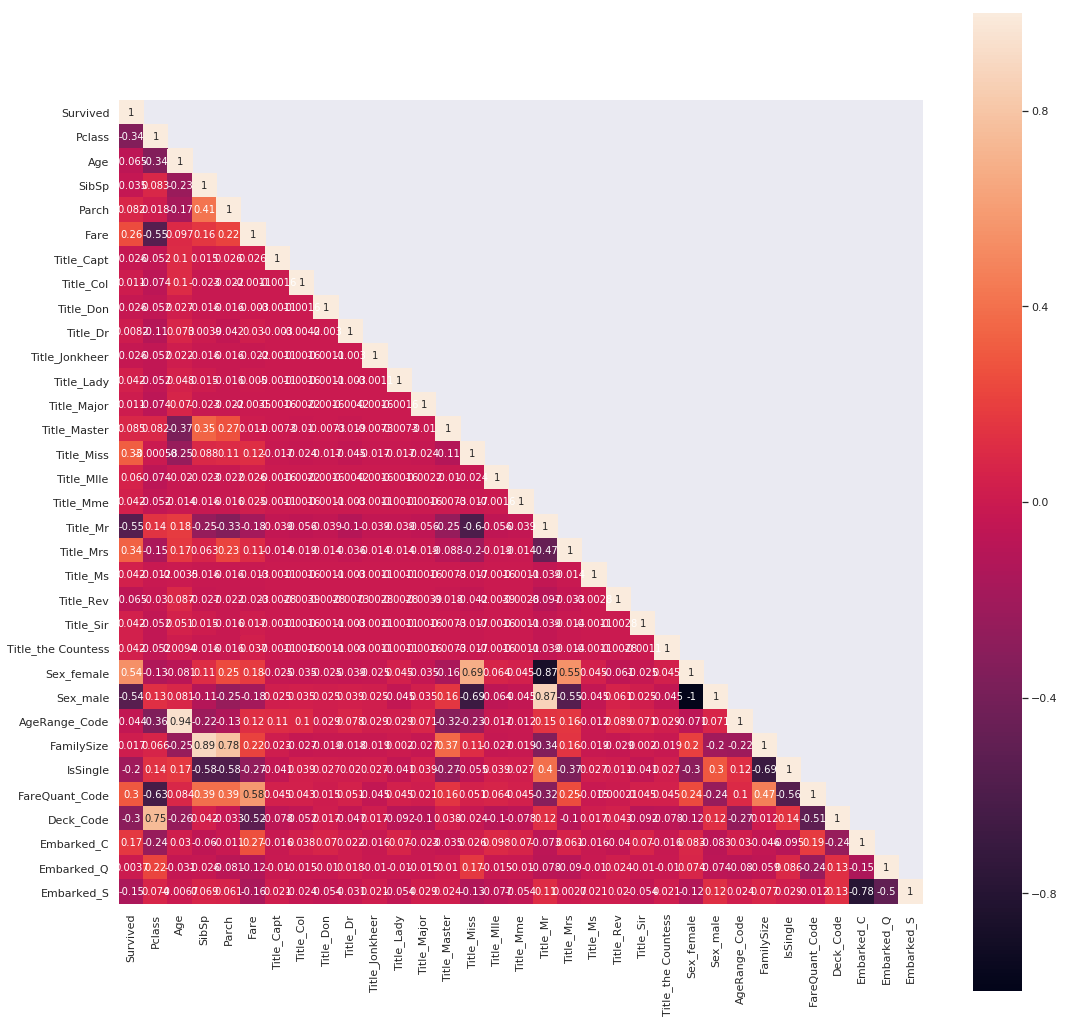

In [38]:
cor_mat = df[:].corr(method='pearson')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(18, 18)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

## Correlations and chi2 with Survived feature

In [39]:
for col in df.columns:
    if col != 'Survived':
        print('Survival Correlation by {}:'.format(col))
        print(df[[col, 'Survived']].groupby(col, as_index=False).mean())
        print('\nchi2_contingency:')
        cross_table = pd.crosstab(df['Survived'], df[col])
        _, p_val, _, _ = stats.chi2_contingency(cross_table)
        print('p_value: {}\n'.format(p_val))
        print(10 * '*')

Survival Correlation by Pclass:
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

chi2_contingency:
p_value: 4.549251711298793e-23

**********
Survival Correlation by Age:
      Age  Survived
0    0.42  1.000000
1    0.67  1.000000
2    0.75  1.000000
3    0.83  1.000000
4    0.92  1.000000
5    1.00  0.714286
6    2.00  0.300000
7    3.00  0.833333
8    4.00  0.700000
9    5.00  1.000000
10   6.00  0.666667
11   7.00  0.333333
12   8.00  0.500000
13   9.00  0.250000
14  10.00  0.000000
15  11.00  0.250000
16  12.00  1.000000
17  13.00  1.000000
18  14.00  0.500000
19  14.50  0.000000
20  15.00  0.800000
21  16.00  0.352941
22  17.00  0.461538
23  18.00  0.346154
24  19.00  0.360000
25  20.00  0.200000
26  20.50  0.000000
27  21.00  0.208333
28  22.00  0.407407
29  23.00  0.333333
..    ...       ...
58  44.00  0.333333
59  45.00  0.416667
60  45.50  0.000000
61  46.00  0.000000
62  47.00  0.111111
63  48.00  0.666667
64  49.00  0.666667
65  50.00  0.5000

   Embarked_C  Survived
0           0  0.344398
1           1  0.553571

chi2_contingency:
p_value: 8.062166851376562e-07

**********
Survival Correlation by Embarked_Q:
   Embarked_Q  Survived
0           0  0.383292
1           1  0.389610

chi2_contingency:
p_value: 0.9891328942213099

**********
Survival Correlation by Embarked_S:
   Embarked_S  Survived
0           0  0.502041
1           1  0.339009

chi2_contingency:
p_value: 1.1291808110540787e-05

**********


# Univariate Analysis

## Distributions

In [ ]:
fig, _ = plt.subplots(figsize=(20, 25))

plt.subplot(4, 3, 1)
sns.barplot(x=df['Survived'].unique(), y=df['Survived'].value_counts())
plt.title('Survivors')

plt.subplot(4, 3, 2)
sns.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts())
plt.title('Pclass')

plt.subplot(4, 3, 3)
sns.barplot(x=df['Sex'].unique(), y=df['Sex'].value_counts())
plt.title('Sex');

plt.subplot(4, 3, 4)
sns.distplot(df['Age'])
plt.title('Age')

plt.subplot(4, 3, 5)
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts())
plt.title('SibSp')

plt.subplot(4, 3, 6)
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts())
plt.title('Parch')

plt.subplot(4, 3, 7)
sns.distplot(df['Fare'])
plt.title('Fare')

plt.subplot(4, 3, 8)
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts())
plt.title('Embarked')

plt.subplot(4, 3, 9)
Title_Master = df['Title_Master'][df['Title_Master'] == 1].count()
Title_Miss = df['Title_Miss'][df['Title_Miss'] == 1].count()
Title_Mr = df['Title_Mr'][df['Title_Mr'] == 1].count()
Title_Mrs = df['Title_Mrs'][df['Title_Mrs'] == 1].count()
Title_Others = df['Title_Others'][df['Title_Others'] == 1].count()
heights = [Title_Master, Title_Miss, Title_Mr, Title_Mrs, Title_Others]
names = ['Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others']
plt.bar(names, heights)
plt.title('Titles')

plt.subplot(4, 3, 10)
sns.barplot(x=df['FamilySize'].value_counts().index, y=df['FamilySize'].value_counts());
plt.title('FamilySize')

plt.subplot(4, 3, 11)
sns.barplot(x=df['IsSingle'].value_counts().index, y=df['IsSingle'].value_counts());
plt.title('IsSingle')

plt.subplot(4, 3, 12)
sns.barplot(x=df['AgeRange_Code'].value_counts().index, y=df['AgeRange_Code'].value_counts());
plt.title('AgeRange_Code')

plt.show()

## Comments

- Deads vs survivors: 62% vs 38%
- Class_1, 2 and 3: 24%, 21% and 55%
- Mens vs women: 65% vs 35%
- Age: High representation around 30 but it seems to be a normal distribution
- SibSp_0, 1, 2, 3, 4, 5 and 8: 68%, 23%, 3%, 2%, 2%, 1% and 1%
- Parch_0, 1, 2, 3, 4, 5 and 6: 76%, 13%, 9%, 1%, 0%, 1% and 0%
- Fare: 75% of fare under 31\$
- Embarked_S, C and Q: 73%, 19% and 9%
- Family_size_1, 2, 3, 4, 5, 6, 7, 8 and 11: 60%, 18%, 11%, 3%, 2%, 2%, 1%, 1% and 1%

# Multivariate Analysis

## Survived vs others features

In [ ]:
fig, _ = plt.subplots(figsize=(20, 25))

plt.subplot(4, 4, 1)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survived vs PClass')

plt.subplot(4, 4, 2)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.title('Sex vs Pclass Survival Comparison')

plt.subplot(4, 4, 3)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survived vs Sex')

plt.subplot(4, 4, 4)
plt.hist(x=[df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 5)
sns.pointplot(x='AgeRange_Code', y='Survived',  data=df)
plt.title('Age Curve by Survival')

plt.subplot(4, 4, 6)
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survived vs SibSP')

plt.subplot(4, 4, 7)
sns.boxenplot(x=df['Survived'], y=df['Parch'])
plt.title('Survived vs Parch')

plt.subplot(4, 4, 8)
ax = sns.boxplot(x=df['Survived'], y=df['Fare'])
ax.set(ylim=(-10, 175))
plt.title('Fare vs Survived')

plt.subplot(4, 4, 9)
plt.hist(x=[df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']], label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 10)
sns.pointplot(x='FareQuant_Code', y='Survived',  data=df)

plt.subplot(4, 4, 11)
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Embarked vs Survived')

plt.subplot(4, 4, 12)
Title_Master_survived = df['Title_Master'][df['Title_Master'] == 1][df['Survived'] == 1].count()
Title_Miss_survived = df['Title_Miss'][df['Title_Miss'] == 1][df['Survived'] == 1].count()
Title_Mr_survived = df['Title_Mr'][df['Title_Mr'] == 1][df['Survived'] == 1].count()
Title_Mrs_survived = df['Title_Mrs'][df['Title_Mrs'] == 1][df['Survived'] == 1].count()
Title_Others_survived = df['Title_Others'][df['Title_Others'] == 1][df['Survived'] == 1].count()
heights = [Title_Master_survived, Title_Miss_survived, Title_Mr_survived, Title_Mrs_survived, Title_Others_survived]
names = ['Master', 'Miss', 'Mr', 'Mrs', 'Others']
plt.bar(names, heights)
plt.title('Survived vs Titles')

plt.subplot(4, 4, 13)
plt.hist(x=[df[df['Survived'] == 1]['FamilySize'], df[df['Survived'] == 0]['FamilySize']], label=['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.legend()

plt.subplot(4, 4, 14)
sns.pointplot(x='FamilySize', y='Survived', data=df)
plt.title('FamilySize Curve by Survival')

plt.subplot(4, 4, 15)
sns.barplot(x='IsSingle', y='Survived', data=df)
plt.title('IsSingle by Survival')

plt.subplot(4, 4, 16)
sns.barplot(x='Sex', y='Survived', hue='IsSingle', data=df)
plt.title('Sex vs IsSingle Survival Comparison')

plt.show()

## Comments

- Survived & Pclass: The survival rate decrease with the Pclass and it's better for women in particular for the first two classes
- Survived & Sex features: Women had a better survival rate than men  
- Survived & Age: The survival rate is better for the very young people and it decreases after 30
- Survived & SibSp: The survival rate is better with 1 SibSp and it decreases until 4
- Survived & Parch: People most survived had between 0 and 2 Parch
- Survived & Fare: People who paid high fare had more chances to survive
- Survived & Embarked: People who embarked in C had better chances to survive than S or Q
- Survived & Titles: Best survival rates for Miss and Mrs
- Survived & FamilySize: The survival rate is better for familisize between 2 and 4
- Survived & IsSingle: More single people who died and the survival rate is better for single women on the other hand this rate is worst for men

# -----------------------------------------------------------------------------------------------------

# Machine Learning - Supervised learning

# -----------------------------------------------------------------------------------------------------

In [ ]:
df.head()

In [ ]:
cols_to_drop = ['Sex', 'Embarked']
df = df.drop(labels=cols_to_drop, axis=1)
df.head()

In [ ]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [ ]:
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

## Best model:

In [ ]:
pipelines = [
('KNeighborsClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])),
('SVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVC', SVC(random_state=42))])),
('LogisticRegression', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42))])),
('RandomForestClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])),
('XGBClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', XGBClassifier(random_state=42))])),
('AdaBoostClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ABC', AdaBoostClassifier(random_state=42))])),
('BaggingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BC', BaggingClassifier(random_state=42))])),
('ExtraTreesClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreesClassifier(random_state=42))])),
('GradientBoostingClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GBC', GradientBoostingClassifier(random_state=42))])),
('LogisticRegressionCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', LogisticRegressionCV(random_state=42))])),
('PassiveAggressiveClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('PAC', PassiveAggressiveClassifier(random_state=42))])),
('RidgeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RC', RidgeClassifier(random_state=42))])),
('RidgeClassifierCV', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RCCV', RidgeClassifierCV())])),
('SGDClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SGDC', SGDClassifier(random_state=42))])),
('LinearSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LSVC', LinearSVC(random_state=42))])),
('NuSVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('NSVC', NuSVC(random_state=42))])),
('DecisionTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('DTC', DecisionTreeClassifier(random_state=42))])),
('ExtraTreeClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('ETC', ExtraTreeClassifier(random_state=42))])),
('GaussianProcessClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GPC', GaussianProcessClassifier(random_state=42))])),
('Perceptron', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('P', Perceptron(random_state=42))])),
('BernoulliNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('BNB', BernoulliNB())])),
('GaussianNB', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('GNB', GaussianNB())])),
('LinearDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])),
('QuadraticDiscriminantAnalysis', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('QDA', QuadraticDiscriminantAnalysis())]))
]

df_models_cols = ['Name', 'Train_Acc_Mean', 'Test_Acc_Mean', 'Test_Acc_3*STD']

models_comparison = pd.DataFrame(columns=df_models_cols)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42)

row = 0

for name, model in pipelines:
    models_comparison.loc[row, 'Name'] = name
    cv_results = cross_validate(model, X_train, y_train, cv=skf, scoring='accuracy')
    models_comparison.loc[row, 'Train_Acc_Mean'] = cv_results['train_score'].mean()
    models_comparison.loc[row, 'Test_Acc_Mean'] = cv_results['test_score'].mean()
    models_comparison.loc[row, 'Test_Acc_3*STD'] = cv_results['test_score'].std() * 3
    model.fit(X_train, y_train)
    row += 1

models_comparison.sort_values(by=['Test_Acc_Mean'], ascending=False, inplace=True)
models_comparison

In [ ]:
best_model_name = models_comparison.iloc[0, 0]
Test_Acc_Mean = models_comparison.iloc[0, 2]
print('Best model: {} \nTest_Acc_Mean: {}'.format(best_model_name, Test_Acc_Mean))

In [ ]:
param_grid = {
    'LRCV__Cs': np.arange(1, 11, 1)
}

pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', LogisticRegressionCV(scoring='accuracy', random_state=42))])

gs = GridSearchCV(pipe, param_grid, cv=skf)

gs.fit(X_train, y_train)

In [ ]:
print("best score: {}".format(gs.best_score_))
print("best params: {}".format(gs.best_params_))

In [ ]:
best_model = gs.best_estimator_
best_model

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
best_model.score(X_train, y_train)

In [ ]:
best_model.score(X_test, y_test)

# ------------------------------------------------------------------------
# --------------------------------TEST---------------------------------
# ------------------------------------------------------------------------

In [ ]:
def clean_df(df):
    df = df.set_index(df['PassengerId'])
    df = df.drop(labels='PassengerId', axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df = df.drop(labels='Ticket', axis=1)
    df = df.drop(labels='Cabin', axis=1)
    sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
    df = pd.concat([df, sex_dummies], axis=1)
    df = df.drop(labels='Sex', axis=1)
    emb_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
    df = pd.concat([df, emb_dummies], axis=1)
    df = df.drop(labels='Embarked', axis=1)
    df['Title_name'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    title_names = (df['Title_name'].value_counts() < 10)
    df['Title_name'] = df['Title_name'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)
    df = df.drop(labels='Name', axis=1)
    title_dummies = pd.get_dummies(df['Title_name'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)
    df = df.drop(labels='Title_name', axis=1)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsSingle'] = 1
    df['IsSingle'].loc[df['FamilySize'] > 1] = 0
    df['FareQuant'] = pd.qcut(df['Fare'], 4)
    df['FareQuant_Code'] = df['FareQuant'].astype('category').cat.codes
    df = df.drop(labels='FareQuant', axis=1)
    df['AgeRange'] = pd.cut(df['Age'].astype(int), 5)
    df['AgeRange_Code'] = df['AgeRange'].astype('category').cat.codes
    df = df.drop(labels='AgeRange', axis=1)
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    return df

In [ ]:
base_path = os.path.join('../input/test.csv')
base_path

In [ ]:
df_test = pd.read_csv(os.path.join(base_path))

In [ ]:
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test.shape

In [ ]:
df_test = clean_df(df_test)
df_test.head()

In [ ]:
df_test.info()

In [ ]:
X_train.shape, y_train.shape, df_test.shape

In [ ]:
model = LogisticRegressionCV(scoring='accuracy', random_state=42, Cs=5)

pipe = Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LRCV', model)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(df_test)

y_pred

In [ ]:
df_sample_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred})

In [ ]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

# Score: 0.79425

# My place: 2507 / 10634

# Top 100: 0.80382